# OpenCV Basics Tutorial

## Objectives
In this lab, we will lay the foundations of OpenCV programming and describe several of the basic and useful operations that are common in computer vision programming. 

By the end of this lab, you should be able to do the following:

* Read an Image from a file
* Display an Image
* Determine the dimensionality of an image
* Draw lines, shapes and text on an image

## Import Libraries

In [1]:
# Load OpenCV Libraries
import cv2

# NumPy is a package for scientific computing with Python
import numpy as np

# Display the results of Matplotlib in this notebook
%matplotlib inline

# Matplotlib is a Python 2D plotting library which
# produces publication quality figures
import matplotlib.pyplot as plt

# Verify the version of OpenCV-Python with which we are working
# Be sure that you are using version 3.3.0 or greater
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 3.4.1


## Reading an Image into Memory

To read a image from a file into memory use the **imread** function. 

By assigning to **img** variable we can address the memory holding of the image and run OpenCV operations on image data.

The image is stored as an NumPy array and allow the developer to access directly to the bites within the array, NumPy has optimized library routines that should be used to manipulate the image data.

Note that if the imread function is not able to read the image into memory, it will return the Python **None** value. This can be used to verify imread's success or failure.

In [2]:
img = cv2.imread('../images/transformers.jpg', cv2.IMREAD_COLOR)

if img is None:
    print('Unable to read this image into memory. Check the OpenCV docs for more information\nhttp://docs.opencv.org/2.4/doc/tutorials/introduction/display_image/display_image.html')
else:
    print('Image successfully loaded!')

Image successfully loaded!


## Understanding Image Properties

Image properties allow the developer to access some basic descriptions of the data contained within the image array.  

* **Image Shape**: This is a Python tuple of number of rows, columns and channels.

* **Image dType**: This describes the data type of each entry in the image array

In [3]:
# In our case the img is 328 pixels tall, 600 pixels wide and it contains 3 channels (red, green and blue).
print("Shape of the Image:", img.shape)

# Each pixel is three 8-bit integers describing the red, green and blue values at a particular point
print("Each pixel is three", img.dtype," values that describe the red, green and blue channel at a particular point.")

#print(img[:2, :2, :])  # Right-upper-most few pixels of the image

('Shape of the Image:', (328, 600, 3))
('Each pixel is three', dtype('uint8'), ' values that describe the red, green and blue channel at a particular point.')


## Displaying an Image

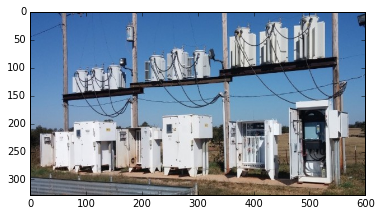

In [4]:
# matplotlib helps to draw image matrix to IPython Notebook
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image Binary Representation

Let's see how pixels represented. Let's read  only the Red values of image and print it.

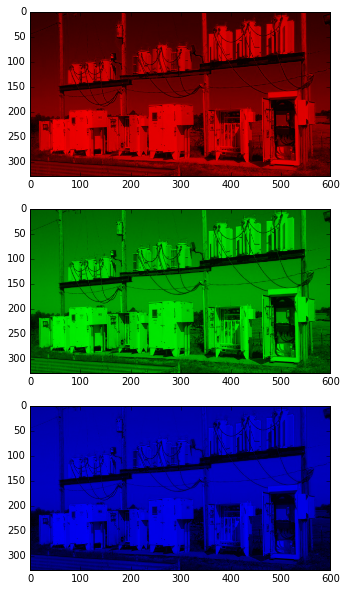

In [5]:
copy1 = cv2.imread('../images/transformers.jpg', cv2.IMREAD_COLOR)
copy2 = cv2.imread('../images/transformers.jpg', cv2.IMREAD_COLOR)
copy3 = cv2.imread('../images/transformers.jpg', cv2.IMREAD_COLOR)

# 2nd index is for RED
# 1st index is for GREEN
# 0th index is for is

copy1[:,:,0] = 0
copy1[:,:,1] = 0

# Let's see Red, Green and Blue scale of Image
plt.figure(figsize=(10, 10));
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(copy1, cv2.COLOR_RGB2BGR))

copy2[:,:,0] = 0
copy2[:,:,2] = 0

plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(copy2, cv2.COLOR_RGB2BGR))

copy3[:,:,1] = 0
copy3[:,:,2] = 0

plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(copy3, cv2.COLOR_RGB2BGR))

## Dislaying a Cropped View of an Image

Since these are standard Python arrays, you can use standard array slicing to produces an image that is cropped.

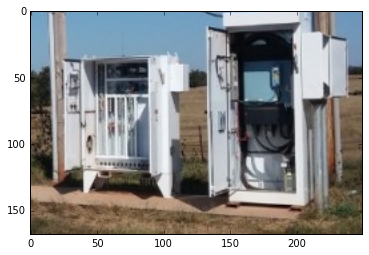

In [6]:
# Image is a 2D Matrix, each cell represents a pixel. 
# You can use Python syntax to select a certain area of an image as shown at below example.
img2 = img[160:340, 330:580]
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## Color Spaces

OpenCV allows you to edit image's colorspace, either with RGB, BGR representation

HSV (Hue, Saturation, Value) based representation 

Grayscale Representation

All defines a certain type of representation with adjusting the colorspace of an image.

Let's see the differences

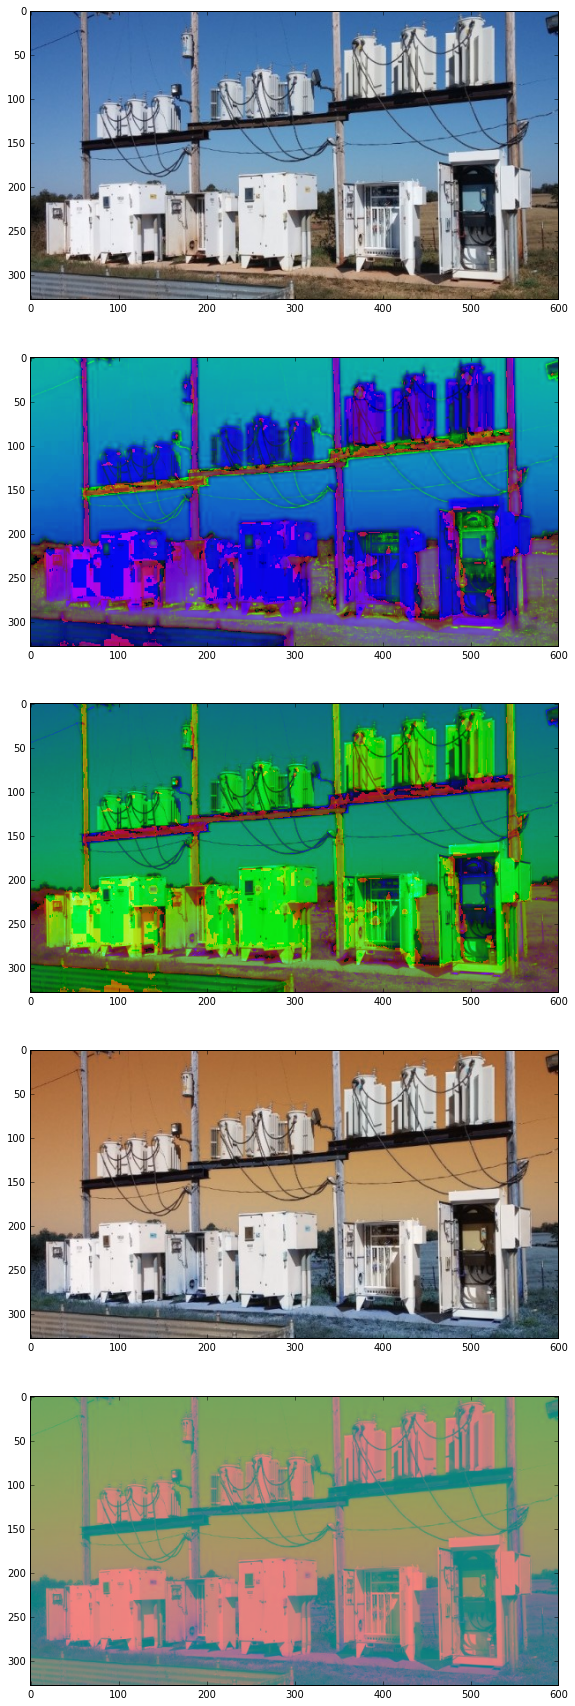

In [7]:
copy = cv2.imread('../images/transformers.jpg', cv2.IMREAD_COLOR)

# Let's see Red, Green and Blue scale of Image
plt.figure(figsize=(30, 30));
plt.subplot(5, 1, 1)
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2BGR))
plt.subplot(5, 1, 2)
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2HSV))
plt.subplot(5, 1, 3)
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2HLS))
plt.subplot(5, 1, 4)
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2RGBA))
plt.subplot(5, 1, 5)
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2YCrCb))

# Basic operations on Images

## 1. Draw an object

Here you can see certain methods provided by OpenCV library to generate custom image arrays.

line method draws a line on a given image with defined color and thickness
- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`

rectangle method draws a rectangle on a given image with defined coordinates on image vector
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`

circle method draws a circle on a given image with as given center and radius on image vector
- `cv2.circle(image, center, radius, rgb, thinkness)`

ellipse method draws a ellipse on a given image with defined parameters
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

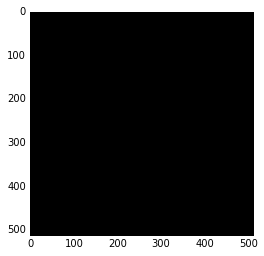

In [8]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

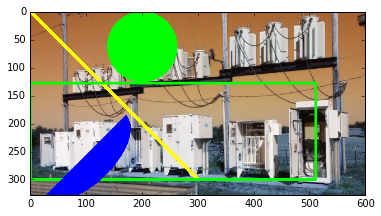

In [9]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img, (0,0), (300,300), (255,255,0), 5)
# => Diagonal yellow line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img, (0,300), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img, (200,63), 63, (0,255,0), -1)
# => Green filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img, (100,256), (100,50), -45, 0, 180, (0,0,255), -1)
# => Blue wide down-half ellipse

plt.imshow(img)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


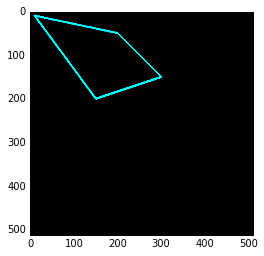

In [10]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print(pts)
plt.imshow(img2)

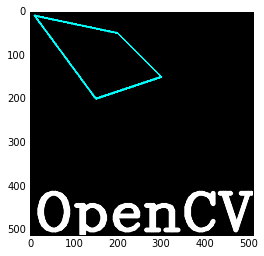

In [11]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)